In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# parameter
learning_rate=0.01
training_epochs = 1000
display_step = 50
initial_accumulator_value=0.1
use_locking=False

In [13]:
# Training Data
train_x=np.asarray([3.3,4.4,5.5,6.6,7.7,8.8,9.9,2.3,4.5])
train_y=np.asarray([1.3,2.4,3.5,4.6,5.7,6.8,7.9,.3,2.5])
n_samples=train_x.shape[0]


In [14]:
# tf graph Input
X=tf.placeholder("float")
Y=tf.placeholder("float")

In [15]:
#set model weight
W=tf.Variable(np.random.randn(), name="weight")
b=tf.Variable(np.random.randn(), name="bias")

In [16]:
#construct linear model
pred=tf.add(tf.multiply(X,W),b)

In [17]:
#Mean Squared error
cost=tf.reduce_sum(tf.pow(pred-Y,2))/(2*n_samples)

In [20]:
# optimizer=tf.train.AdagradOptimize
optimizer=tf.train.AdagradOptimizer(learning_rate, initial_accumulator_value, use_locking, name='Adagrad').minimize(cost)

In [21]:
# assign the variable(ie assign their default value)
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.997470975 W= 0.414324 b= 1.51491
Epoch: 0100 cost= 0.910852134 W= 0.449861 b= 1.49534
Epoch: 0150 cost= 0.877241969 W= 0.468034 b= 1.46772
Epoch: 0200 cost= 0.856169522 W= 0.479392 b= 1.43927
Epoch: 0250 cost= 0.839664578 W= 0.487433 b= 1.41175
Epoch: 0300 cost= 0.825444460 W= 0.493649 b= 1.38557
Epoch: 0350 cost= 0.812656999 W= 0.498768 b= 1.36079
Epoch: 0400 cost= 0.800905764 W= 0.503177 b= 1.3373
Epoch: 0450 cost= 0.789966881 W= 0.5071 b= 1.31499
Epoch: 0500 cost= 0.779697657 W= 0.510672 b= 1.29374
Epoch: 0550 cost= 0.769997239 W= 0.513979 b= 1.27344
Epoch: 0600 cost= 0.760788858 W= 0.517077 b= 1.25398
Epoch: 0650 cost= 0.752013206 W= 0.520006 b= 1.23529
Epoch: 0700 cost= 0.743620276 W= 0.522794 b= 1.21728
Epoch: 0750 cost= 0.735574007 W= 0.525462 b= 1.1999
Epoch: 0800 cost= 0.727839053 W= 0.528026 b= 1.18308
Epoch: 0850 cost= 0.720387101 W= 0.530498 b= 1.16679
Epoch: 0900 cost= 0.713195562 W= 0.532889 b= 1.15098
Epoch: 0950 cost= 0.706241906 W= 0.535205 b= 1.135

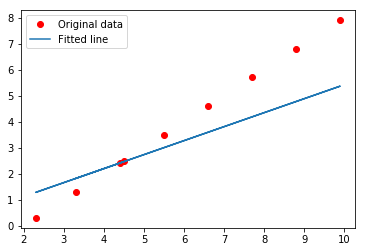

In [28]:
# start training
with tf.Session() as sess:
    sess.run(init)
    
    # fit all training data
    for epochs in range(training_epochs):
        for(x,y) in zip(train_x,train_y):
            sess.run(optimizer,feed_dict={X:x,Y:y})
            
        # Display epoch per steps
        
        if(epochs+1)%display_step==0:
            c=sess.run(cost,feed_dict={X:train_x,Y:train_y})
            print("Epoch:", '%04d' % (epochs+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))
    
    print("optimization finished!")
    training_cost = sess.run(cost, feed_dict={X: train_x, Y: train_y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')
    #Graphic display
    plt.plot(train_x, train_y, 'ro', label='Original data')
    plt.plot(train_x, sess.run(W) * train_y + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()      